# Descriptive Statistics: The State of Financial Inclusion in Kenya, Tanzania, Uganda and Rwanda

## 1. Defining the question

### a) Specifying the Data Analytic Question

The solution will seek to show the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while giving in depth insights into some of the key demographic factors that might drive individuals’ financial outcomes.


### b) The Metric for Success

We aim to establish the factors that detemine an individuals ability to have a bank account and make reccomendations to banks on how they can reach more people to have bank accounts

### c) The Experimental Design
 Below are the steps taken in this analysis
 1. loading the required libraries
 2. Loading and previewing data
 3. Cleaning the data
 4. Univariate analysis
 5. Bivariate analysis
 6. Multivriate analysis
 7. Implementing the solution by using the neccesary analysis(PCA, LDA or Factor Analysis)
 8. Challenging the solution and giving insights on how improvements can be made.


### d) Data Relevance and Validation 

The data available is relevant for the intended analysis. It contains demographic information that is significant to financnial inclusion in the four countries covering 2016 to 2018.
The data will help us in answering the data analytic question on the demographic factors that affect financial inclusion. 

### e) Understanding the context 

The data set we are to work with contains the following columns:
1. country: Country interviewee is in.
2. year:Year survey was done in
3. uniqueid:Unique identifier for each interviewee
4. Has a Bank account:Yes, No
5. Type of Location:Type of location: Rural, Urban
6. Cell Phone Access:If interviewee has access to a cellphone: Yes, No
7. household_size:Number of people living in one house
8. Respondent Age:The age of the interviewee
9. gender_of_respondent:Gender of interviewee: Male, Female
10. The relathip with head:The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
11. marital_status:The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know
12. Level of Educuation:Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
13. Type of Job:Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer

The data used in this analytic can be accessed through this [link text](https://)

## 2. Reading the Data

 ### a) Loading the Required Libraries

In [1]:
# Importing the libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### b) Reading the Data

In [2]:
#Loading our dataset
data=('/home/sammy/Documents/Financial Inclusion/Financial-Inclusion/Financial Inclusion')
financial_data=pd.read_csv(data)

# Exploring our  data set
financial_data.head()

,Unnamed: 0,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
#Checking the tail end of our data
financial_data.tail()

,Unnamed: 0,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [4]:
# Checking the shape of the data to establish the number of rows and columns
financial_data.shape

(23524, 14)

**Observation**

This observation indicates our data has 23524 rows and 13 columns

In [5]:
# Checking the summary information of the data, the datatypes of the various columns
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23524 non-null  int64  
 1   country                 23510 non-null  object 
 2   year                    23524 non-null  int64  
 3   uniqueid                23524 non-null  object 
 4   Has a Bank account      23488 non-null  object 
 5   Type of Location        23509 non-null  object 
 6   Cell Phone Access       23513 non-null  object 
 7   household_size          23496 non-null  float64
 8   Respondent Age          23490 non-null  float64
 9   gender_of_respondent    23490 non-null  object 
 10  The relathip with head  23520 non-null  object 
 11  marital_status          23492 non-null  object 
 12  Level of Educuation     23495 non-null  object 
 13  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [6]:
#Checking for the uniques values in each column
financial_data.nunique()

Unnamed: 0                23524
country                       4
year                          6
uniqueid                   8735
Has a Bank account            2
Type of Location              2
Cell Phone Access             2
household_size               21
Respondent Age               85
gender_of_respondent          2
The relathip with head        6
marital_status                5
Level of Educuation           7
Type of Job                  10
dtype: int64

**Observation**
Here we can see the number of unique values in each column


## 3. Cleaning the Dataset

In [7]:
#Checking the column names to ascertain they are well writted and formatted
#The output shows tehre are typing errors and the formating is not consistently correct
financial_data.columns

Index(['Unnamed: 0', 'country', 'year', 'uniqueid', 'Has a Bank account',
       'Type of Location', 'Cell Phone Access', 'household_size',
       'Respondent Age', 'gender_of_respondent', 'The relathip with head',
       'marital_status', 'Level of Educuation', 'Type of Job'],
      dtype='object')

**Observation**

Here we see that the column names are not consistently written. There are errors and the format is not consistent.

In [8]:
#Renaming the column names to rectify typing errors and formatting 
# financial_data.rename(columns={'country':'country', 'year':'year', 'uniqueid':'uniqueid','Has a Bank account':'has_a_bank_account','Type of Location':'type_of_Location',
# 'Cell Phone Access':'cell_phone_access','household_size':'household_size','Respondent Age':'respondent_age','gender_of_respondent':'gender_of_respondent',
# 'The relathip with head':'the_relatioship_with_head','marital_status':'marital_status','Level of Educuation':'level_of_education','Type of Job':'type_of_Job'},inplace = True)
# financial_data.head(0)

#A more  efficient code 

# Define a mapping function to correct column names
def correct_column_name(col_name):
    # Replace spaces with underscores
    col_name = col_name.replace(' ', '_')
    # Convert to lowercase
    col_name = col_name.lower()
    # Correct specific name errors if needed
    col_name = col_name.replace('has_a_bank_account', 'has_bank_account')
    col_name = col_name.replace('the_relathip_with_head', 'the_relationship_with_head')
    col_name = col_name.replace('level_of_educuation', 'level_of_education')

    
    return col_name

# Apply the mapping function to correct the column names
financial_data.columns = financial_data.columns.map(correct_column_name)

# Display the first few rows to check the corrected column names
print(financial_data.head())

   unnamed:_0 country  year    uniqueid has_bank_account type_of_location  \
0           0   Kenya  2018  uniqueid_1              Yes            Rural   
1           1   Kenya  2018  uniqueid_2               No            Rural   
2           2   Kenya  2018  uniqueid_3              Yes            Urban   
3           3   Kenya  2018  uniqueid_4               No            Rural   
4           4   Kenya  2018  uniqueid_5               No            Urban   

  cell_phone_access  household_size  respondent_age gender_of_respondent  \
0               Yes             3.0            24.0               Female   
1                No             5.0            70.0               Female   
2               Yes             5.0            26.0                 Male   
3               Yes             5.0            34.0               Female   
4                No             8.0            26.0                 Male   

  the_relationship_with_head           marital_status  \
0                     S

In [9]:
# Ascertaining the number of countries contained in this data
financial_data.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

**Observation**

Here we realize there are four countries, Kenya, Rwanda, Tanzania and Uganda. We also see there are nan values.

In [10]:
# Establishing the existing null values
financial_data.isnull().sum()

unnamed:_0                     0
country                       14
year                           0
uniqueid                       0
has_bank_account              36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

**Observation**
we realize that there are null values in all columns apart from the year and uniqueid columns with the count ranging from 4 to 36.

In [11]:
# Dropping null values
new_financial_df=financial_data.dropna()
new_financial_df.isnull().sum()

unnamed:_0                    0
country                       0
year                          0
uniqueid                      0
has_bank_account              0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

**Observation**
We see that all the null values have been eliminated 

In [12]:
#Checking for the year column to understand the data
new_financial_df.year.unique()


array([2018, 2029, 2056, 2016, 2039, 2017])

**Observation**

Here we see there are wrongly captured years, we expect years between 2016 to 2018

In [13]:
# Fixing wrong data to remove the years that were wrong
new_financial_df
for x in new_financial_df.index:
  if new_financial_df.loc[x, "year"] > 2018:
    new_financial_df.loc[x, "year"] = 2018

#Checking to see the corrected years
new_financial_df.year.unique()

array([2018, 2016, 2017])

Here we see the years are now between 2016 and 2018

In [14]:
#Changing data types
for col in ['household_size', 'respondent_age']:
  new_financial_df[col]=new_financial_df[col].astype('int64')

new_financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   unnamed:_0                  23343 non-null  int64 
 1   country                     23343 non-null  object
 2   year                        23343 non-null  int64 
 3   uniqueid                    23343 non-null  object
 4   has_bank_account            23343 non-null  object
 5   type_of_location            23343 non-null  object
 6   cell_phone_access           23343 non-null  object
 7   household_size              23343 non-null  int64 
 8   respondent_age              23343 non-null  int64 
 9   gender_of_respondent        23343 non-null  object
 10  the_relationship_with_head  23343 non-null  object
 11  marital_status              23343 non-null  object
 12  level_of_education          23343 non-null  object
 13  type_of_job                 23343 non-null  ob

/tmp/ipykernel_5489/600789991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df[col]=new_financial_df[col].astype('int64')


In [17]:
new_financial_df['type_of_job'].value_counts()

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

In [ ]:
#Checking for the value counts of the level of education column
new_financial_df['level_of_education'].value_counts()

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: level_of_education, dtype: int64

We can see the counts of the different levels of education. We also notice that there is a level denoted as 6 and 'Other/Dont know/RTA' since we dont understand them fully and they may intefere with analysis we will drop them.

In [ ]:
# Dropping the rows we do not need from the Education level column
new_financial_df.drop(new_financial_df.index[(new_financial_df['level_of_education']=='6')], axis=0, inplace=True)
new_financial_df.drop(new_financial_df.index[(new_financial_df['level_of_education']=='Other/Dont know/RTA')], axis=0, inplace=True)

#Checking to see whether the two column values have been dropped
new_financial_df['level_of_education'].value_counts()

/tmp/ipykernel_9488/1886169231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df.drop(new_financial_df.index[(new_financial_df['level_of_education']=='6')], axis=0, inplace=True)
/tmp/ipykernel_9488/1886169231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df.drop(new_financial_df.index[(new_financial_df['level_of_education']=='Other/Dont know/RTA')], axis=0, inplace=True)


Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
Name: level_of_education, dtype: int64

We can see the two unwanted values have been dropped

In [ ]:
#Checking the value counts for the marital status column
new_financial_df['marital_status'].value_counts()

Married/Living together    10679
Single/Never Married        7897
Widowed                     2677
Divorced/Seperated          2047
Dont know                      8
Name: marital_status, dtype: int64

In [ ]:
#Checking the value counts for the the relationship with head
new_financial_df['the_relatioship_with_head'].value_counts()
   

Head of Household      12710
Spouse                  6459
Child                   2219
Parent                  1069
Other relative           662
Other non-relatives      189
Name: the_relatioship_with_head, dtype: int64

In [ ]:
#Checking the value counts for the cell phone access
new_financial_df['cell_phone_access'].value_counts()

Yes    17311
No      5997
Name: cell_phone_access, dtype: int64

In [ ]:
#Checking the value counts for the type of location
new_financial_df['type_of_Location'].value_counts()

Rural    14245
Urban     9063
Name: type_of_Location, dtype: int64

In [ ]:
#Checking the value counts for the bank account access
new_financial_df['has_a_bank_account'].value_counts()

No     20022
Yes     3286
Name: has_a_bank_account, dtype: int64

In [ ]:
#Checking the value counts for the country
new_financial_df['country'].value_counts()

Rwanda      8666
Tanzania    6497
Kenya       6056
Uganda      2089
Name: country, dtype: int64

## 4. Exploratory Data Analysis

### a) Univariate Analysis

In [ ]:
#Checking whether the data has anomalies.
import plotly.express as px
fig = px.box(new_financial_df, y="household_size", title='financial_data')
fig.show()

**Observation**

The box plot is positively skewed as the median is closer to the lower quartile

In [ ]:
#Checking whther the data has outliers.
import plotly.express as px
fig = px.box(new_financial_df, x="respondent_age", title='financial_data')
fig.show()

**Observation**

The box plot is positively skewed as the median is closer to the lower quartile

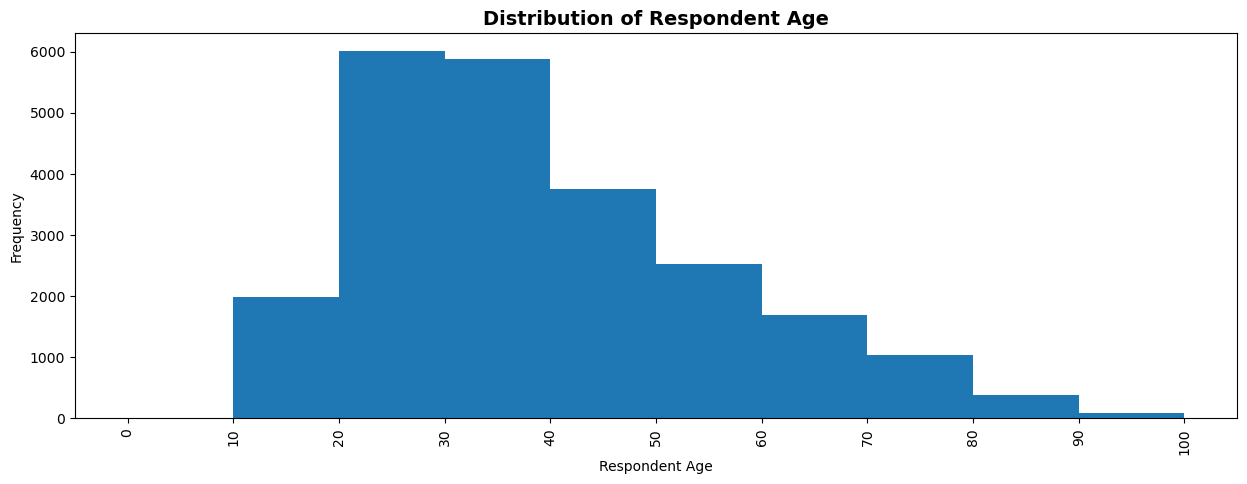

In [ ]:
# Plot the Respondent Age Histogram
# Set the diagram size
plt.figure(figsize=[15,5])

# define the bin size
bin_size = np.arange(0, new_financial_df['respondent_age'].max()+0.5, 10) # The value 10 may vary depending on the values in the x variable

# plot the histogram
new_financial_df['respondent_age'].plot(kind='hist', bins = bin_size, xticks=bin_size)
plt.xticks(rotation=90)
plt.title('Distribution of Respondent Age', weight='bold', fontsize=14)
plt.xlabel('Respondent Age')
plt.ylabel('Frequency');

**Observation**
Here we see that most of the respondent are between 20 and 40 years. We also see ther are respondents who are 100 years old.

In [ ]:
# Median age of the respondents
median=new_financial_df['respondent_age'].median()
print(median)
#The average sage of the respondents
mean=new_financial_df['respondent_age'].mean()
print(mean)
#The mode of the respondents age
mode=new_financial_df['respondent_age'].mode()
print(mode)
#Variance of the respondents age
var=new_financial_df['respondent_age'].var()
print(var)
#The standard devaition the age of the respondents
std=new_financial_df['respondent_age'].std()
print(std)

35.0
38.789085292603396
0    30
Name: respondent_age, dtype: int64
272.51011040882713
16.507880251832066


We can see that the respondents have a median age of 35 and an average age of 37.79 while the mode is 30. 

The variance is 272.51 which very far from 1 signifying a very high variability and the data is further from the mean.

The standard devaition is 16.5 which indicates the values lie far from the mean

In [ ]:
# Median size of the households
median=new_financial_df['household_size'].median()
print(median)
#The average size of the households
mean=new_financial_df['household_size'].mean()
print(mean)
#The mode of the household sizes
mode=new_financial_df['household_size'].mode()
print(mode)
#Variance of the house hold size
var=new_financial_df['household_size'].var()
print(var)
#The standard devaition the age of the respondents
std=new_financial_df['household_size'].std()
print(std)

3.0
3.688304444825811
0    2
Name: household_size, dtype: int64
5.200348899112789
2.2804273501062884


Here we see that the median household sizes is 3 while the mean 3.69 and the mode is 2. 

The variance is 5.2. which is greater than 1 indicating high variability
THe standard deviation is 2.28 which indicates the values are not very close to the mean.

In [ ]:
#Range of the respondents age
max_age= new_financial_df['respondent_age'].max()
min_age=new_financial_df['respondent_age'].min()
age_range=max_age-min_age
age_range

84

In [ ]:
#Range of the respondents age
max_size= new_financial_df['household_size'].max()
min_size=new_financial_df['household_size'].min()
size_range=max_size-min_size
size_range

21

In [ ]:
#The skewdness of the household sizes
print(new_financial_df['household_size'].skew())

#The skewdness of the respondents age
print(new_financial_df['respondent_age'].skew())

0.9734025808601462
0.8411487627052998


The household size has a skedness of 0.97 while respondents age has a skewness of 0.84, both are positively skewed

In [ ]:
# Measuring kurtosis, if the the result is greater than zero then it is a leptokurtic distribution
new_financial_df['household_size'].kurt()

1.1524031555419247

In [ ]:
# Measuring kurtosis, when the result is greater than zero then is a leptokurtic distribution
new_financial_df['respondent_age'].kurt()

0.10094476941178732

In [ ]:
#A summary of the descriptive statistics of the dataset.
new_financial_df.describe()

,Unnamed: 0,year,household_size,respondent_age
count,23308.000000,23308.000000,23308.000000,23308.000000
mean,11723.138407,2016.977733,3.688304,38.789085
std,6794.467720,0.848993,2.280427,16.507880
min,0.000000,2016.000000,0.000000,16.000000
25%,5838.750000,2016.000000,2.000000,26.000000
50%,11679.500000,2017.000000,3.000000,35.000000
75%,17597.250000,2018.000000,5.000000,49.000000
max,23523.000000,2018.000000,21.000000,100.000000


**Observations**
The data indicates the counts of household sizes and respondents age which are 23343 each.
the summary indicates the standars deviation of 2.28 meaning the data is clustered around the mean for household size and 16.15 for respondent age implying highly spread out data.
The summary also indicates the 25th and 50th and 75th percentiles together with minimum na maximum data points.

<Axes: title={'center': 'Access to a Bank Account'}>

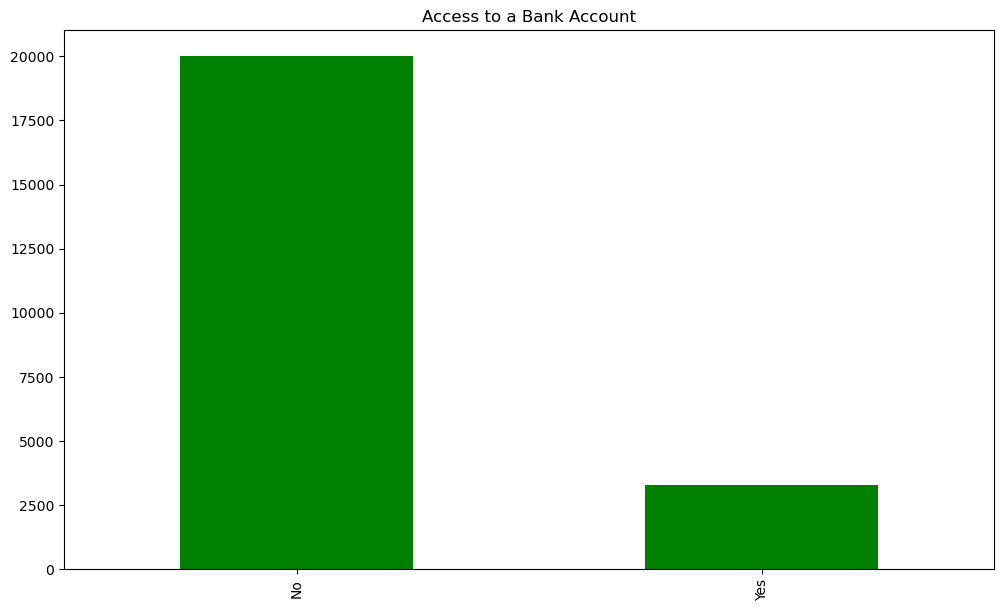

In [ ]:
# Visualization of the people who have and those who dont have bank accounts with a bar chart

figsize=(8, 9)
new_financial_df['has_a_bank_account'].value_counts().plot.bar(title="Access to a Bank Account", figsize=(12, 7), color='green')

This visualization indicates that there are very many people who do not have access to a bank account, those who have a bank account are very few

In [ ]:
new_financial_df.head(0)

,Unnamed: 0,country,year,uniqueid,has_a_bank_account,type_of_Location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relatioship_with_head,marital_status,level_of_education,type_of_Job


### b) Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

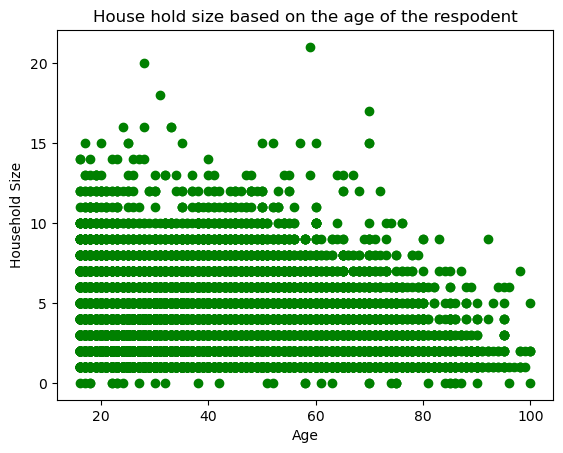

In [ ]:
# A scatter plot of the house hold size based on the respondent age
plt.scatter(new_financial_df["respondent_age"], new_financial_df["household_size"], color='green')
plt.title('House hold size based on the age of the respodent')
plt.xlabel('Age')
plt.ylabel('Household Size')

plt.show 

This scatter plot signifies no correlation where as age increases there no increase in household size.

In [ ]:
#Correlation co-efficient to determine the relationship betweeen house hold sizes and the age of the respodent
# We calculate the Pearson co-efficint

new_financial_df["household_size"].corr(new_financial_df["respondent_age"])

-0.11925255014109945

**Observation**
The above output indicates a weak negative correlation

In [ ]:
# Summary of correllation coefficint
new_financial_df.corr()

/tmp/ipykernel_9488/3066994322.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,year,household_size,respondent_age
Unnamed: 0,1.000000,-0.140247,-0.192130,-0.047738
year,-0.140247,1.000000,-0.052606,-0.017941
household_size,-0.192130,-0.052606,1.000000,-0.119253
respondent_age,-0.047738,-0.017941,-0.119253,1.000000


**Observation**

The above shows a summary of the correlations between the house hold size and the respondents age. All are indicating a weak correlation which is negative

/tmp/ipykernel_9488/277027021.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



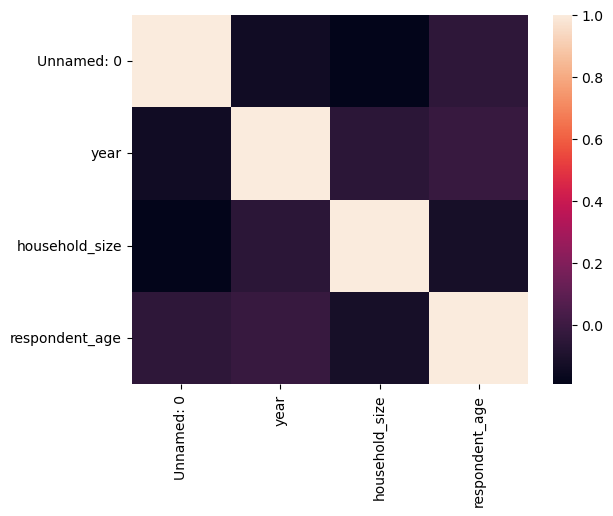

In [ ]:
#Correllation heatmap
sns.heatmap(new_financial_df.corr())
plt.show()

In [ ]:
from _plotly_utils.colors.colorbrewer import Pastel1
#Comparing th gender of the respondent to having a bank account
pd.crosstab([new_financial_df.has_a_bank_account],new_financial_df.gender_of_respondent, margins=True).style.background_gradient(cmap='Pastel1_r')

gender_of_respondent,Female,Male,All
has_a_bank_account,,,
No,12272,7750,20022
Yes,1473,1813,3286
All,13745,9563,23308


We see that there are more females than males without bank accounts. There are also more males with bank accounts compared to females

In [ ]:
#Comparing having a bank account to type of location
pd.crosstab([new_financial_df.has_a_bank_account],new_financial_df.type_of_Location, margins=True).style.background_gradient(cmap='Pastel1_r')

type_of_Location,Rural,Urban,All
has_a_bank_account,,,
No,12585,7437,20022
Yes,1660,1626,3286
All,14245,9063,23308


Here we see that most of the respondents come from rural locations. Most of those with bank accounts come from rural areas compred to urban.
Also th majority of those without bnk accounts come from rural areas compared to those from urban areas

In [ ]:
# Comparing having a bank account with access to a phone
pd.crosstab([new_financial_df.has_a_bank_account],new_financial_df.cell_phone_access, margins=True).style.background_gradient(cmap='Pastel1_r')

cell_phone_access,No,Yes,All
has_a_bank_account,,,
No,5893,14129,20022
Yes,104,3182,3286
All,5997,17311,23308


More respondents have acces to a phone compared to those who do not, and majority of those with access to a phone 17311 do not have a bank account 3182.
5997 respondents do not have access to a phone and of these 104 have access to a bank account compareeed to 5893 who do not have access.
Here we see that despite access to a phone being high, access to a bank accout is still low

In [ ]:
#Comparing having a bank account based on marital status
pd.crosstab([new_financial_df.has_a_bank_account],new_financial_df.marital_status, margins=True).style.background_gradient(cmap='Pastel1_r')

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed,All
has_a_bank_account,,,,,,
No,1815,6,8824,6941,2436,20022
Yes,232,2,1855,956,241,3286
All,2047,8,10679,7897,2677,23308


Here we see that most people are married and living together do not have bank accounts with few of them having an account. The seconf largets number is those single/never married who most of who dont have bank accounts too. For all the other sub-categories of the marital status, the proportion of those who dont have accounts is very high compared to those who have. 
Its noteworthy that the proportion of those without accounts is very close to those with accounts for the widowed. 


In [ ]:
#Comparison of having a bank acccount with type of job
pd.crosstab([new_financial_df.has_a_bank_account],new_financial_df.type_of_Job, margins=True).style.background_gradient(cmap='Pastel1_r')

type_of_Job,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed,All
has_a_bank_account,,,,,,,,,,,
No,111,4788,87,480,197,5096,602,880,2268,5513,20022
Yes,14,634,297,566,49,438,13,194,239,842,3286
All,125,5422,384,1046,246,5534,615,1074,2507,6355,23308


We see that the group with largets proportion of people having bank accounts is those formally employment by the government followed by those formally employed in private. All the other categories have more people not having bank accounts compared to those who have.
There are people with no income who still have access to bank accounts.

In [ ]:
#Comparison of having a bank acccount with level of education
pd.crosstab([new_financial_df.has_a_bank_account], new_financial_df.level_of_education, margins=True).style.background_gradient(cmap='Pastel1_r')

level_of_education,No formal education,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,All
has_a_bank_account,,,,,,
No,4291,11606,3226,554,345,20022
Yes,176,1083,981,590,456,3286
All,4467,12689,4207,1144,801,23308


We can see that the higher the level of education, the more likely a person is to have a bank account. those with nor formal education and those with primary level education have a smaller prorportion with accounts. 

In [ ]:
#Comparision of having a bank account in the different countries
pd.crosstab([new_financial_df.has_a_bank_account], new_financial_df.country, margins=True).style.background_gradient(cmap='Pastel1_r')

country,Kenya,Rwanda,Tanzania,Uganda,All
has_a_bank_account,,,,,
No,4542,7673,5899,1908,20022
Yes,1514,993,598,181,3286
All,6056,8666,6497,2089,23308


This analysis shows that Kenya seems to be fairing a better proportion between those with accounts compared to those who dont. This is follwed by Rwanda, Tanzania and Uganda in that order

### c) Multivariate Analysis

We are going to perform multivariate analysis with our data set to establish the financial inclusion status in the four countries. We will employ data reduction techniques on the data.

In [ ]:
#Changing data types of the categorical variables to category from object
financial1= new_financial_df[['country', 'year', 'uniqueid', 'has_a_bank_account',
                              'type_of_Location','cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relatioship_with_head', 'marital_status',
       'level_of_education', 'type_of_Job']].astype('category')
# Making the 3 columns in interger format to remain in the same dtype
for col in ['year', 'household_size', 'respondent_age']:
  financial1[col]=financial1[col].astype('int64')

print(financial1.dtypes)

country                      category
year                            int64
uniqueid                     category
has_a_bank_account           category
type_of_Location             category
cell_phone_access            category
household_size                  int64
respondent_age                  int64
gender_of_respondent         category
the_relatioship_with_head    category
marital_status               category
level_of_education           category
type_of_Job                  category
dtype: object


**Observation**

from above we can see that the categorical variables data types indicate as category instead of object which makes them easier to use. the other 3 are rightly indicated as integers

In [ ]:
# Here we embark on encoding the categorical variables to make it easier to use for the data reduction analysis
financial1_onehot=financial1.copy()
financial1_onehot=pd.get_dummies(financial1_onehot, columns=['country', 'type_of_Location', 'cell_phone_access',
                                                             'gender_of_respondent','the_relatioship_with_head', 'marital_status',
                                                             'level_of_education','type_of_Job'],prefix=['country','type_of_Location', 
                                                             'cell_phone_access','gender_of_respondent','the_relatioship_with_head', 
                                                             'marital_status','level_of_education','type_of_Job'])
financial1_onehot.head()


,year,uniqueid,has_a_bank_account,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_Location_Rural,...,type_of_Job_Dont Know/Refuse to answer,type_of_Job_Farming and Fishing,type_of_Job_Formally employed Government,type_of_Job_Formally employed Private,type_of_Job_Government Dependent,type_of_Job_Informally employed,type_of_Job_No Income,type_of_Job_Other Income,type_of_Job_Remittance Dependent,type_of_Job_Self employed
0,2018,uniqueid_1,Yes,3,24,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,uniqueid_2,No,5,70,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2018,uniqueid_3,Yes,5,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,uniqueid_4,No,5,34,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2018,uniqueid_5,No,8,26,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Observation**

The above output shows that the categorical variables have been encoded into numerical variables.


In [ ]:
# Checking the columns of our data set after the encoding
financial1_onehot.columns

Index(['year', 'uniqueid', 'has_a_bank_account', 'household_size',
       'respondent_age', 'country_Kenya', 'country_Rwanda', 'country_Tanzania',
       'country_Uganda', 'type_of_Location_Rural', 'type_of_Location_Urban',
       'cell_phone_access_No', 'cell_phone_access_Yes',
       'gender_of_respondent_Female', 'gender_of_respondent_Male',
       'the_relatioship_with_head_Child',
       'the_relatioship_with_head_Head of Household',
       'the_relatioship_with_head_Other non-relatives',
       'the_relatioship_with_head_Other relative',
       'the_relatioship_with_head_Parent', 'the_relatioship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_No formal education',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertia

#### Linear Discriminant Analysis

We are going to perform Linear Discriminant Analysis(LDA) on our data set. This is infored by the type of data and the objective of our analysis which is to establish the level of financial inclusion that exists.



In [ ]:
# Checking the shape of our data
financial1_onehot.shape

(23308, 41)

**Observation**

The output bove indicates that our data has 23343 rows and 43 columns

In [ ]:
# We drop the uniqueid column as it has no significance to what we are planning to do
financial1_onehot.drop(['uniqueid'],axis=1, inplace=True)
financial1_onehot.shape

(23308, 40)

**observation**

After droping the column we see that we remain with 23343 rows and 42 columns

In [ ]:
# previewing the top of the data we are to use
financial1_onehot.head(3)

,year,has_a_bank_account,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_Location_Rural,type_of_Location_Urban,...,type_of_Job_Dont Know/Refuse to answer,type_of_Job_Farming and Fishing,type_of_Job_Formally employed Government,type_of_Job_Formally employed Private,type_of_Job_Government Dependent,type_of_Job_Informally employed,type_of_Job_No Income,type_of_Job_Other Income,type_of_Job_Remittance Dependent,type_of_Job_Self employed
0,2018,Yes,3,24,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,No,5,70,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,Yes,5,26,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Step 1
# We start LDA by first dividing the data into feutures and then assigning the the indepedent and depedent variables to X and y

X = financial1_onehot.iloc[:, 2:42].values
y = financial1_onehot["has_a_bank_account"]

In [ ]:
# Step 2
# This step entails dividing the datasets into trainining and test sets
# We start by importing the neccessary libray for the same

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Step 3 
# Here we do feuture scaling, we start by importing the library neccesary fo scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 4
# Here we perform LDA. We start by importing the library neccesary then perform LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

lda = LDA(n_components=1) #Here we pass the number of components which is te linear disciminates we want to get 
X_train = lda.fit_transform(X_train, y_train) #Fit and transform methhods helps s to get the linear discriminants
X_test = lda.transform(X_test)

In [ ]:
# Step 5
# Next we train and make predictions making use of Random Forest after importing 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

In [ ]:
# Step 6
# Here we evaluate the performance. We make use of the confusion matrix and find the accuraccy of the prediction
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_prediction)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_prediction)))

[[3955   41]
 [ 522  144]]
Accuracy0.8792363792363792


**Observation**

The above output indicates our confusion matrix output. There is also the performance which has an accuracy of 88%.

This accuracy indicates that all the feutures are important and have significance on financial inclusion.

## 5. Conclusion and Reccommendations

1. There are more females than males without bank accounts. There are also more males with bank accounts compared to females. Banks should focus target more females who have numbers and are a potential market.
2. More people live in rural areas and most of those dont have bank accounts. Banks should explore the rural aras as more people live there and they dont have bank accounts.
3. More people have access to mobiles phones, however a large proportion of these do not have acess to a bank account. Banks can use mobiles phones as an avenue to incrase their reach on the people. 
4. Its noteworthy that the proportion of those without accounts is very close to those with accounts for the widowed.
5. The informally employed form a sizable portion of the people and most dont have bank accounts. Banks should have option that caters for this section of the pople.
6. Uganda and Tanzania have low levels of financial inclusion compared to the other two countries. Banks looking to expand should thin of these countries as ideal markets to expand into.
